Preprocessing of the Brain Data  
Karoline Lutz  
2021
--------------
- filtering for  cells without atac barcode
- basic QC

In [14]:
import anndata as ad
import pandas as pd
import numpy as np
from scipy import sparse
import scanpy as sc
import matplotlib.pyplot as plt


In [15]:
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=250,
                     frameon=True, vector_friendly=True,
                     color_map="YlGnBu", format='pdf', transparent=False,
                     ipython_format='png2x')

# RNA

In [28]:
rna = ad.read("C:\\Users\\Karol\\Desktop\\singlecell\\data\\brain\\GSM4156610_brain_raw_cell_annot.rna.h5ad")
rna

AnnData object with n_obs × n_vars = 5875 × 21127
    obs: 'atac_barcode', 'paper_cell_type'

In [29]:
# some cells contain no matching atac barcode and need to be filtered out
count = 0
for code in rna.obs['atac_barcode']:
    if code == 'NA':
        count += 1
        
print(count)

count = 0
for code in rna.obs['paper_cell_type']:
    if code == 'NA':
        count += 1
        
print(count)

2582
2582


In [30]:
rna.obs

,atac_barcode,paper_cell_type
index,,
R1.01.R2.01.R3.24.P1.40,NA,NA
R1.01.R2.04.R3.55.P1.40,R1.01.R2.04.R3.55.P1.32,EN07
R1.01.R2.05.R3.35.P1.40,R1.01.R2.05.R3.35.P1.32,P1
R1.01.R2.08.R3.24.P1.40,NA,NA
R1.01.R2.08.R3.45.P1.39,R1.01.R2.08.R3.45.P1.31,IN01
...,...,...
R1.96.R2.84.R3.71.P1.39,R1.96.R2.84.R3.71.P1.31,EN02
R1.96.R2.85.R3.91.P1.39,NA,NA
R1.96.R2.88.R3.65.P1.39,R1.96.R2.88.R3.65.P1.31,IN01


In [31]:
#filter out the 'NA' cells that cant be matched to a atac barcode or cell type
rna = rna[rna.obs['atac_barcode'] != 'NA']

rna = rna[rna.obs['atac_barcode'] != 'NA']
rna

c:\users\karol\desktop\singlecell\recent\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


View of AnnData object with n_obs × n_vars = 3293 × 21127
    obs: 'atac_barcode', 'paper_cell_type'

In [32]:
count = 0
for code in rna.obs['atac_barcode']:
    if code == 'NA':
        count += 1
        
print(count)

count = 0
for code in rna.obs['paper_cell_type']:
    if code == 'NA':
        count += 1
        
print(count)

0
0


In [33]:
rna.obs

,atac_barcode,paper_cell_type
index,,
R1.01.R2.04.R3.55.P1.40,R1.01.R2.04.R3.55.P1.32,EN07
R1.01.R2.05.R3.35.P1.40,R1.01.R2.05.R3.35.P1.32,P1
R1.01.R2.08.R3.45.P1.39,R1.01.R2.08.R3.45.P1.31,IN01
R1.01.R2.08.R3.78.P1.39,R1.01.R2.08.R3.78.P1.31,EN02
R1.01.R2.09.R3.52.P1.40,R1.01.R2.09.R3.52.P1.32,IN02
...,...,...
R1.96.R2.79.R3.15.P1.39,R1.96.R2.79.R3.15.P1.31,MX
R1.96.R2.84.R3.71.P1.39,R1.96.R2.84.R3.71.P1.31,EN02
R1.96.R2.88.R3.65.P1.39,R1.96.R2.88.R3.65.P1.31,IN01


c:\users\karol\desktop\singlecell\recent\lib\site-packages\scanpy\preprocessing\_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


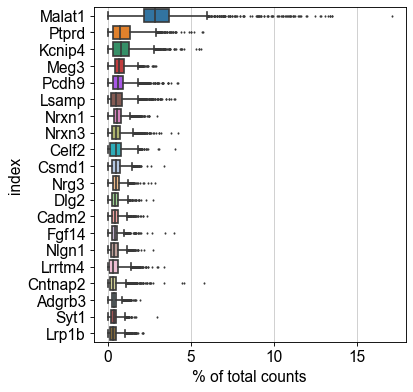

In [34]:
sc.pl.highest_expr_genes(rna, n_top = 20)

In [35]:
sc.pp.filter_cells(rna, min_genes = 200)

c:\users\karol\desktop\singlecell\recent\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [36]:
sc.pp.filter_genes(rna, min_cells = 2)

In [37]:
rna

AnnData object with n_obs × n_vars = 3264 × 18931
    obs: 'atac_barcode', 'paper_cell_type', 'n_genes'
    var: 'n_cells'

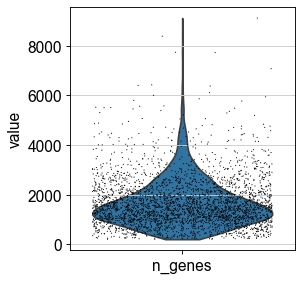

In [38]:
sc.pl.violin(rna, 'n_genes', jitter = 0.4)

In [39]:
sc.pp.calculate_qc_metrics(rna, percent_top = None, log1p = False, inplace = True)

In [40]:
rna

AnnData object with n_obs × n_vars = 3264 × 18931
    obs: 'atac_barcode', 'paper_cell_type', 'n_genes', 'n_genes_by_counts', 'total_counts'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

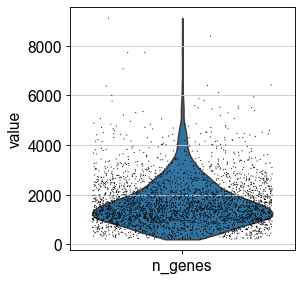

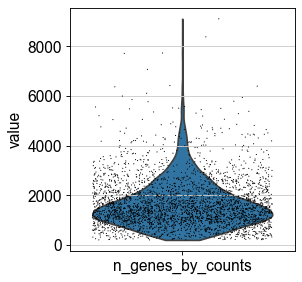

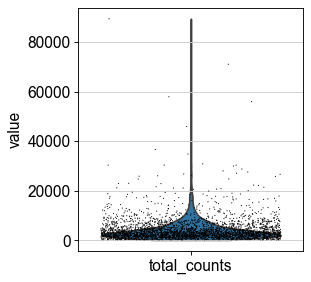

In [41]:
sc.pl.violin(rna, 'n_genes', jitter = 0.4, save='_brain_QC_ngenes.pdf')
sc.pl.violin(rna, 'n_genes_by_counts', jitter = 0.4, save='_brain_QC_genesbycount.pdf') # number of genes with positive counts in a cell
sc.pl.violin(rna, 'total_counts', jitter = 0.4, save='_brain_QC_totalcounts.pdf') # number of total counts  for a cell

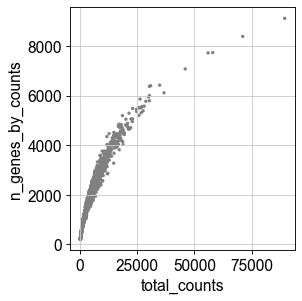

In [42]:
sc.pl.scatter(rna, x = 'total_counts', y = 'n_genes_by_counts', save='_brain_beforefilter.pdf')

In [43]:
rna

AnnData object with n_obs × n_vars = 3264 × 18931
    obs: 'atac_barcode', 'paper_cell_type', 'n_genes', 'n_genes_by_counts', 'total_counts'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [44]:
# filter the anndata object
rna = rna[rna.obs.n_genes_by_counts < 7500, :]
rna

c:\users\karol\desktop\singlecell\recent\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


View of AnnData object with n_obs × n_vars = 3260 × 18931
    obs: 'atac_barcode', 'paper_cell_type', 'n_genes', 'n_genes_by_counts', 'total_counts'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

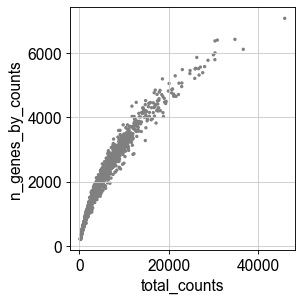

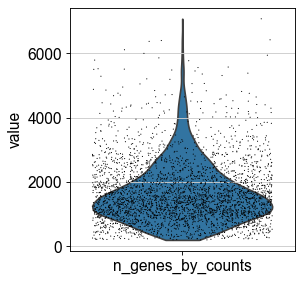

In [45]:
sc.pl.scatter(rna, x = 'total_counts', y = 'n_genes_by_counts', save='_brain_afterfilter.pdf')

sc.pl.violin(rna, 'n_genes_by_counts', jitter = 0.4, save='_brain_QC_genesbycount_afterfilter.pdf')

In [48]:
rna.write('C:\\Users\\Karol\\Desktop\\singlecell\\data\\preprocessed\\GSM4156610_brain_filtered_cell_annot.rna.h5ad')

In [49]:
# next: normalize, logtransform too
sc.pp.normalize_total(rna, target_sum = 1e4)
sc.pp.log1p(rna)

c:\users\karol\desktop\singlecell\recent\lib\site-packages\scanpy\preprocessing\_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [50]:
rna.write('C:\\Users\\Karol\\Desktop\\singlecell\\data\\preprocessed\\GSM4156610_brain_logNorm_cell_annot.rna.h5ad')

#### visualizing for control

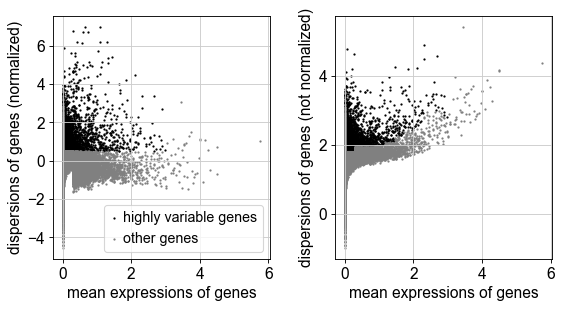

In [51]:
# look at highly variable genes
sc.pp.highly_variable_genes(rna, min_mean = 0.0125, max_mean = 3, min_disp = 0.5)
sc.pl.highly_variable_genes(rna, save = '_brain.pdf')

In [52]:
rna.raw = rna
#rna.write('/home/karo/Desktop/singleCell/GSM4156610_brain_filtered_cell_annot.rna.h5ad')

In [147]:
rna = ad.read('/home/karo/Desktop/singleCell/GSM4156610_brain_filtered_cell_annot.rna.h5ad')

In [53]:
rna = rna[:, rna.var.highly_variable]

c:\users\karol\desktop\singlecell\recent\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [54]:
sc.pp.regress_out(rna, 'total_counts')

In [55]:
sc.pp.scale(rna, max_value = 10)

In [31]:
rna.write('/home/karo/Desktop/singleCell/GSM4156610_brain_scaled_cell_annot.rna.h5ad')

c:\users\karol\desktop\singlecell\recent\lib\site-packages\pandas\core\arrays\categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


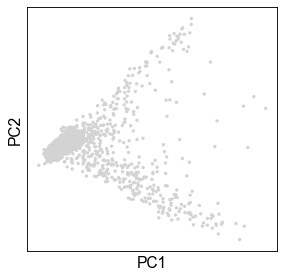

In [56]:
# PCA
sc.tl.pca(rna, svd_solver = 'arpack')

sc.pl.pca(rna, save = '_brain_scaledpca.pdf')

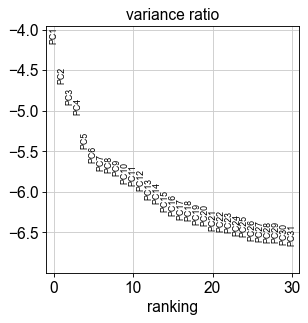

In [57]:
sc.pl.pca_variance_ratio(rna, log = True, save = '_brain_scaledratio.pdf')

In [58]:
sc.pp.neighbors(rna, n_neighbors = 10, n_pcs = 40)
sc.tl.umap(rna)


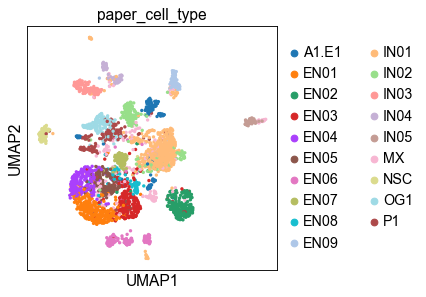

In [59]:
sc.pl.umap(rna, color = 'paper_cell_type', save = '_brain_controlumap.pdf')